# Car Sales
download: [link](https://www.kaggle.com/datasets/missionjee/car-sales-report)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
df = pd.read_csv('Car Sales.xlsx - car_data.csv')
df = df.drop(['Car_id', 'Customer Name', 'Phone', 'Dealer_Region'], axis=1)

In [56]:
df.describe()

,Annual Income,Price ($)
count,2.390600e+04,23906.000000
mean,8.308403e+05,28090.247846
std,7.200064e+05,14788.687608
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.175750e+06,34000.000000
max,1.120000e+07,85800.000000


In [98]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style
0,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV
1,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV
2,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger
3,2022-01-02,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV
4,2022-01-02,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback
...,...,...,...,...,...,...,...,...,...,...,...,...
23901,2023-12-31,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger
23902,2023-12-31,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop
23903,2023-12-31,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan
23904,2023-12-31,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger


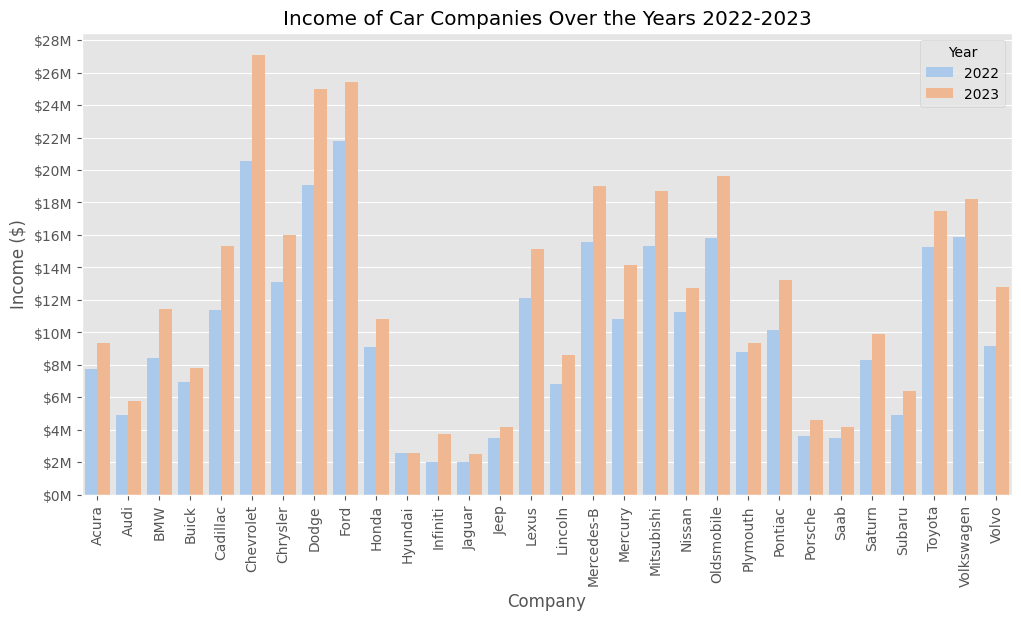

In [125]:
company_income = df.copy()
company_income['Year'] = company_income['Date'].dt.year
company_income = company_income.groupby(['Company', 'Year']).sum('Price ($)').reset_index()
company_income = company_income.melt(id_vars=['Company', 'Year'], value_vars=['Price ($)'], var_name='Income', value_name='Income ($)')

plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Income ($)', hue='Year', data=company_income, palette='pastel')
plt.title('Income of Car Companies Over the Years 2022-2023')
plt.xticks(rotation=90)
plt.yticks(range(0, 30000000, 2000000), [f'${i}M' for i in range(0, 30, 2)])
plt.show()

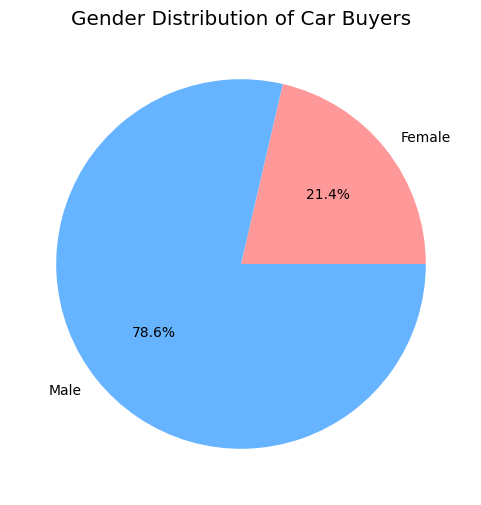

In [136]:
gender_df = df.copy().groupby('Gender').size().reset_index(name='Count')
plt.figure(figsize=(6, 6))
plt.pie('Count', labels='Gender', data=gender_df, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Gender Distribution of Car Buyers')
plt.show()

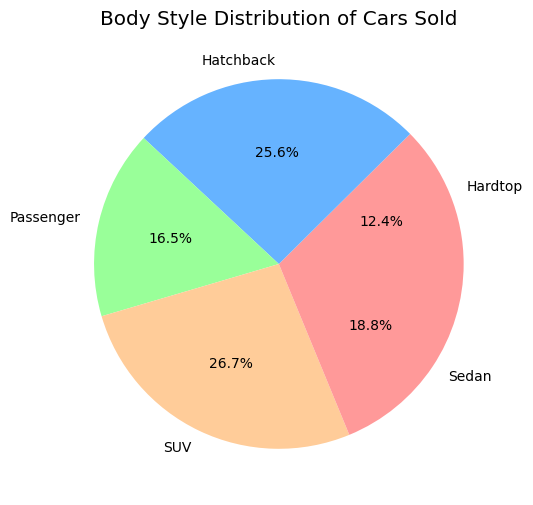

In [ ]:
body_df = df.copy().groupby('Body Style').size().reset_index(name='Count')
plt.figure(figsize=(6, 6))
plt.pie('Count', labels='Body Style', data=body_df, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Body Style Distribution of Cars Sold')
plt.show()